In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
import collections
import lmfit as lm
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#mpl.rc('font', family='sans-serif') 
#mpl.rc('font', 'sans-serif'='Helvetica') 
mpl.rc('text', usetex='false') 
mpl.rcParams.update({'font.size': 14})

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'mathtext.default':  'regular' })
%matplotlib notebook
%matplotlib notebook

In [3]:
loadnames = ['2_DarkEcho_Si29_240s_VA39_redo.mat']
Echoin = sio.loadmat(loadnames[0])
time = Echoin['xtime'].flatten()*1e6
EchoI = Echoin['EchosI'][4].flatten()


def gaussian(x, amp, cen, wid,bg):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))+bg

gmodel = lm.Model(gaussian)
result = gmodel.fit(EchoI, x=time, amp=7, cen=2, wid=1,bg = -1)

print(result.fit_report())

DarkEcho = result.params['amp']*0.760968/(time[2] - time[1])/4/np.sqrt(2)


fig,ax = plt.subplots(figsize=(86*mm, 86*mm/1.618))
#ax.plot(time, result.init_fit, 'k--', label='initial fit')
ax.plot(time, result.best_fit, 'r-', label='best fit')

ax.tick_params(direction='in')
ax.plot(time,EchoI)
ax.set_xlim([0,5])
plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 42
    # data points      = 5000
    # variables        = 4
    chi-square         = 252.242259
    reduced chi-square = 0.05048884
    Akaike info crit   = -14926.0161
    Bayesian info crit = -14899.9473
[[Variables]]
    amp:  7.99298886 +/- 0.02141497 (0.27%) (init = 7)
    cen:  1.82755123 +/- 0.00112423 (0.06%) (init = 2)
    wid:  0.38346814 +/- 0.00114529 (0.30%) (init = 1)
    bg:  -1.34546182 +/- 0.00335317 (0.25%) (init = -1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) =  0.598
    C(amp, bg)  = -0.319
    C(wid, bg)  = -0.191



NameError: name 'mm' is not defined

In [4]:
intstart = result.params['cen'] - np.sqrt(2*np.log(2))*result.params['wid']
intstop = result.params['cen'] + np.sqrt(2*np.log(2))*result.params['wid']
idxstart =  np.argmax(time > intstart)
idxstop =  np.argmax(time > intstop)
Echo2 = np.sum(EchoI[idxstart:idxstop]) - result.params['bg'] * (idxstop - idxstart)

In [89]:
Echo2/4/np.sqrt(2)

266.59539788578513

In [91]:
DarkEcho

268.7532679585839

In [5]:
loadnames = ['9_Si29_CTLSW_TwoColorESR_LF_2_a_2_a_2_va24_500ms_TiSap855p6_8mW_1s',
             '3_Si29_CTLSW_TwoColorESR_LF_2_a_2_a_2_va24_500ms_TiSap855p6_8mW_500ms.mat',
             '4_Si29_CTLSW_TwoColorESR_LF_2_a_2_a_2_va24_500ms_TiSap855p6_8mW_300ms.mat',
             '5_Si29_CTLSW_TwoColorESR_LF_2_a_2_a_2_va24_500ms_TiSap855p6_8mW_200ms.mat',
             '6_Si29_CTLSW_TwoColorESR_LF_2_a_2_a_2_va24_500ms_TiSap855p6_8mW_100ms.mat',
             '7_Si29_CTLSW_TwoColorESR_LF_2_a_2_a_2_va24_500ms_TiSap855p6_8mW_50ms.mat',
             '8_Si29_CTLSW_TwoColorESR_LF_2_a_2_a_2_va24_500ms_TiSap855p6_8mW_50ms_OD04.mat']
dictnames = ['1s','500ms','300ms','200ms','100ms','50ms','50ms OD0.4']

TwoColorData = collections.defaultdict(dict)
for fname,sname in zip(loadnames,dictnames):
    datain = sio.loadmat(fname)
    keynameWL = list(datain.keys())[-7]
    keynameSPpi = list(datain.keys())[3]
    keynameSP = list(datain.keys())[5]
    wax = datain[keynameWL].flatten()
    SPolpi = datain[keynameSPpi].flatten()/DarkEcho * 2.9
    SPol = datain[keynameSP].flatten()/DarkEcho * 2.9
    SPolPiSS = np.mean(SPolpi[-10:-1])
    SPolSS = np.mean(SPol[-10:-1])
    
    TwoColorData[sname]['Wavelength'] = wax[2:-1]
    TwoColorData[sname]['SpinPolPi'] = SPolpi[2:-1]
    TwoColorData[sname]['SpinPol'] = SPol[2:-1]
    TwoColorData[sname]['SPolSS'] =  SPolSS
    TwoColorData[sname]['SPolPiSS'] =  SPolPiSS

In [22]:
TwoColorData[sname]['SPolSS']

'signalIrefnoBg'

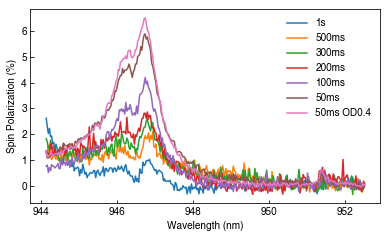

In [6]:
mm = 1/25.4

fig,ax = plt.subplots(figsize=(140*mm, 140*mm/1.618))
ax.tick_params(direction='in')

[ax.plot(TwoColorData[keyname]['Wavelength'],TwoColorData[keyname]['SpinPol']-TwoColorData[keyname]['SPolSS']) for keyname in TwoColorData.keys()]
#[ax.plot(TwoColorData[keyname]['Wavelength'],TwoColorData[keyname]['SpinPol']) for keyname in TwoColorData.keys()]
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Spin Polarization (%)")
ax.set_yscale('linear')
ax.legend(dictnames,framealpha = 0)
#plt.gca().legend(('29Si','28Si and 30Si'),framealpha=0)
plt.tight_layout()
#ax.set_ylim([-5000,5000])

fig1 = plt.gcf()
plt.show()
#fig1.savefig('IsotopeShift1.pdf', format='pdf')

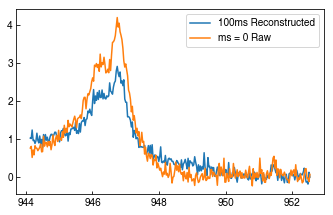

In [80]:
fig,ax = plt.subplots(figsize=(140*mm, 140*mm/1.618))
ax.tick_params(direction='in')

for sname in dictnames:
    TwoColorData[sname]['P0'] = (1+2*TwoColorData[sname]['SPolSS']/100)/3
    TwoColorData[sname]['P1'] = (1-TwoColorData[sname]['SPolSS']/100)/3

Refname = '500ms'
S0 = TwoColorData[Refname]['SpinPol'] - TwoColorData[Refname]['SPolSS']
S1 = TwoColorData[Refname]['SpinPolPi'] - TwoColorData[Refname]['SPolPiSS']
## Decomposed spin polarization
delta = 0
#s0 = (TwoColorData[Refname]['P0']*S0 - TwoColorData[Refname]['P1'] *S1)/(TwoColorData[Refname]['P0']**2 - TwoColorData[Refname]['P1']**2)
s1 = (TwoColorData[Refname]['P0']*S1 - TwoColorData[Refname]['P1'] *S0)/(TwoColorData[Refname]['P0']**2 +delta*TwoColorData[Refname]['P0']*TwoColorData[Refname]['P1'] - (1+delta)*TwoColorData[Refname]['P1']**2)
s00 = (S0 - (1+delta)*TwoColorData[Refname]['P1']*s1)/TwoColorData[Refname]['P0']
ssname = '100ms'
#ax.plot(TwoColorData[Refname]['Wavelength'],s0,label = 'Old')
#ax.plot(TwoColorData[Refname]['Wavelength'],s00,label = 'new')

ax.plot(TwoColorData[ssname]['Wavelength'],TwoColorData[ssname]['P0']*s0 + TwoColorData[ssname]['P1']*(1+delta)*s1,label =ssname + ' Reconstructed')
ax.plot(TwoColorData[ssname]['Wavelength'],TwoColorData[ssname]['SpinPol']-TwoColorData[ssname]['SPolSS'],label = 'ms = 0 Raw')
ax.legend()

In [118]:
TwoColorData['1s']['SPolSS']

45.74401844057297

In [139]:
TwoColorData['50ms']['P1']

0.27800449637770036